In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Fish_dataset.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
df.shape

(159, 7)

In [14]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

# Checking The Null Values

In [15]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Duplicates

In [16]:
df.duplicated().sum()

0

# uivariate Analysis

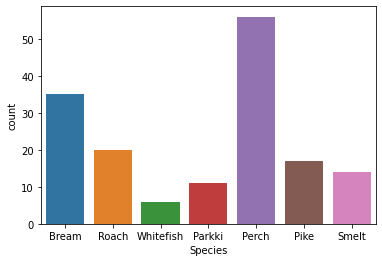

In [17]:
sns.countplot(x=df['Species'])
plt.show()

C:\Users\gaurm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


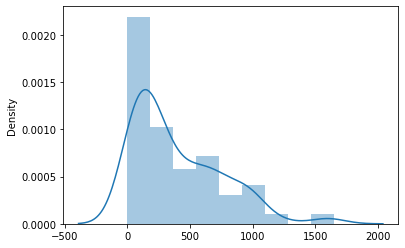

In [18]:
sns.distplot(x=df['Weight'])
plt.show()

#### This Data is Not Normally Distributed So We Resolve This Error With Log Tranformation/np.sqrt

C:\Users\gaurm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


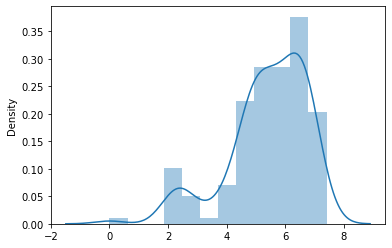

In [19]:
sns.distplot(x=np.log1p(df['Weight']))
plt.show()

#### inference = this data is also not normally distributed and this is right Skewed 

C:\Users\gaurm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


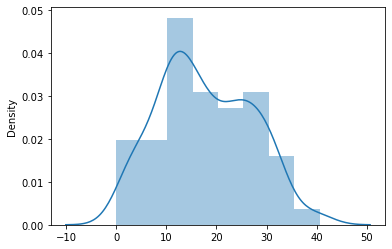

In [20]:
sns.distplot(x=np.sqrt(df['Weight']))
plt.show()

#### inference = This Data is Bi-Model 

# Seprating The Object Column and Integer columns

In [21]:
cat_col = [ i for i in df.columns if df[i].dtypes=='object']
print(cat_col)
int_col = [i for i in df.columns if df[i].dtypes!='object']
print(int_col)
print(len(int_col))

['Species']
['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
6


# Bi-variate Analysis

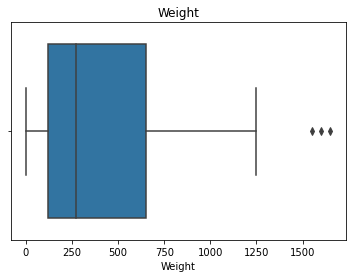

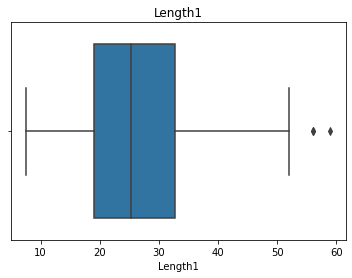

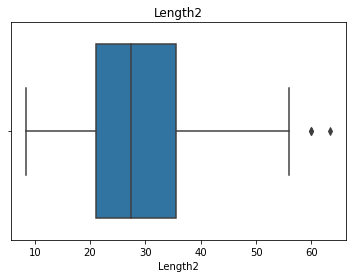

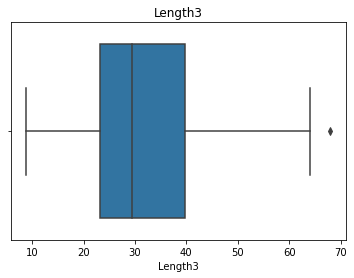

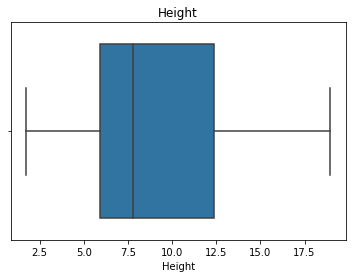

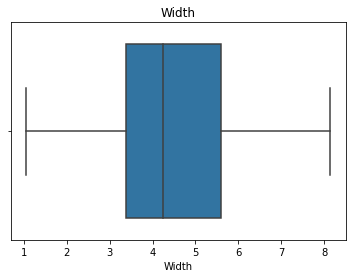

In [22]:
for i in int_col:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

### Inferece = weight,length1,length2,length3 Has The Upper Outlier

# Appling The PairPLot

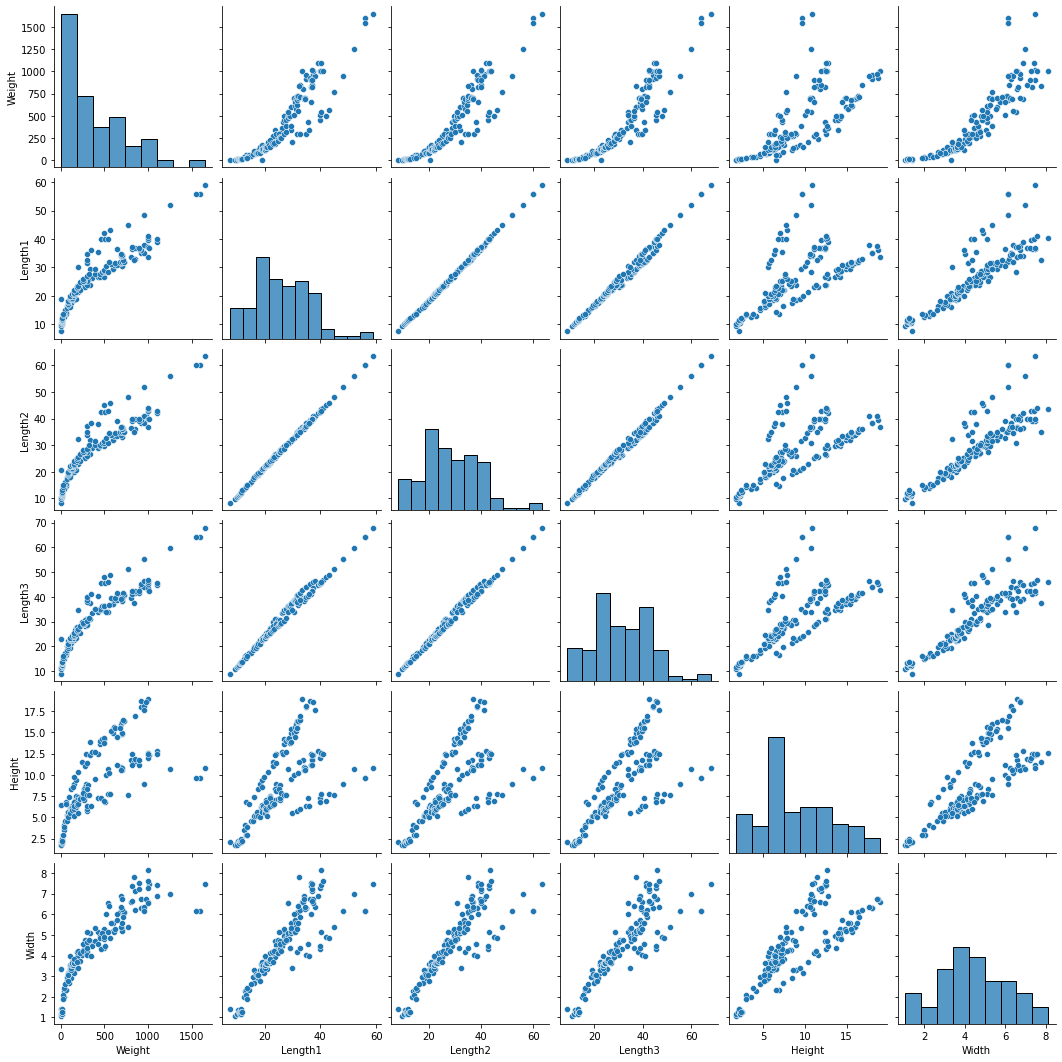

In [23]:
sns.pairplot(data=df)
plt.show()

#### Inferene = This Data Is Seems To Linearly

# Appling Label Encoder For Species

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lb = LabelEncoder()
df['Species'] = lb.fit_transform(df['Species'])

In [28]:
df['Species'].value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: Species, dtype: int64

# Correlation

In [29]:
corr = df.corr()
corr

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


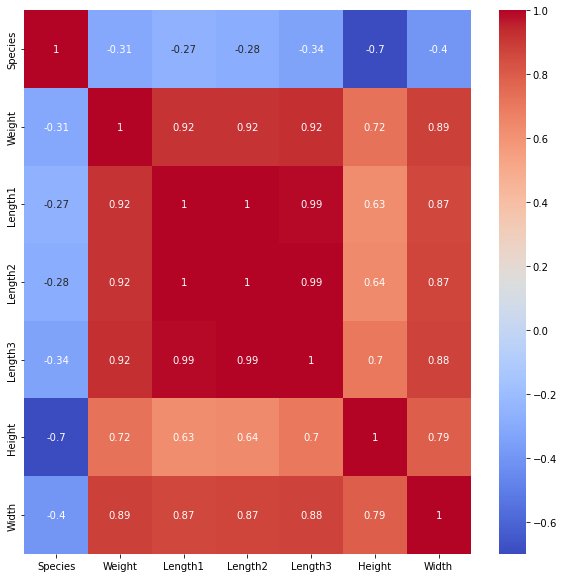

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Checking The Multicoliniarity And Higly Correlated Columns

In [179]:
def high_corr(data,thresh):
    res = set()
    data = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >=thresh:
                res.add(corr.columns[i])
    return list(res)

multicor = high_corr(df,0.8)
print(multicor)

['Length3', 'Width', 'Length2', 'Length1']


#### Inference => These columns are Highly Correlated 

# Outlier Handling

In [32]:
df.describe(percentiles=[0.01,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,3%,5%,50%,97%,98%,99%,max
Species,159.0,2.264151,1.704249,0.0000,0.000000,0.000000,0.00000,2.0000,6.000000,6.000000,6.000000,6.000
Weight,159.0,398.326415,357.978317,0.0000,6.364000,8.388000,9.80000,273.0000,1100.000000,1226.000000,1571.000000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,9.706000,10.622000,11.30000,25.2000,45.710000,51.408000,56.000000,59.000
Length2,159.0,28.415723,10.716328,8.4000,10.206000,11.148000,11.80000,27.3000,48.962000,55.312000,60.000000,63.400
Length3,159.0,31.227044,11.610246,8.8000,11.264000,12.296000,13.10000,29.4000,52.214000,58.964000,64.000000,68.000
Height,159.0,8.970994,4.286208,1.7284,1.874056,2.088528,2.20356,7.7860,17.730984,18.076464,18.685296,18.957
Width,159.0,4.417486,1.685804,1.0476,1.148400,1.232426,1.28314,4.2485,7.466976,7.491256,7.679758,8.142


#### Inference = Weight,Length1,Length2,Length3 having outlier

In [33]:
out_col = ['Weight','Length1','Length2','Length3']

In [34]:
def outlier_treatment(x):
    x=x.clip(upper=x.quantile(0.98))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [35]:
df[out_col] = df[out_col].apply(lambda x: outlier_treatment(x))

In [37]:
df[out_col].head()

,Weight,Length1,Length2,Length3
0,242.0,23.2,25.4,30.0
1,290.0,24.0,26.3,31.2
2,340.0,23.9,26.5,31.1
3,363.0,26.3,29.0,33.5
4,430.0,26.5,29.0,34.0


### Selecting X and Y Model Building

In [38]:
x = df.drop('Weight',axis=1)
y = df['Weight']
print(x.shape)
print(y.shape)

(159, 6)
(159,)


In [39]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 6)
(40, 6)
(119,)
(40,)


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Model = 1
Linear Regression

In [91]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [92]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[ 7.63738234e+01 -1.08529207e+02  3.32687116e+02  4.01162941e+02
  1.39779654e+02  8.25148494e+02 -1.70973992e+02  2.97073688e+02
  2.51113524e+02  1.02964136e+03  5.85672515e+02  8.92683637e+02
  5.89542345e+02  1.83379498e+02  6.59263561e+02  8.12308580e+02
  9.19892870e+02  3.43157320e+02  2.62079945e+02  5.76243759e+02
 -1.33318276e+02  6.32032451e+02  5.05343326e+02  4.96471532e+02
  8.19328004e+02  9.11618221e+02  2.02573618e+02  3.96705622e+02
 -1.84007034e+02 -1.35040003e+02  6.10259106e+02  3.84179017e+00
 -5.26234320e-01  7.44380990e+02  3.34961842e+02  1.55354117e+02
  2.07408248e+02  1.44896092e+02  2.41352042e+02  8.46818836e+02]


In [93]:
# r2_score
print('training score',m1.score(x_train,y_train))
print('testing score',m1.score(x_test,y_test))

training score 0.9096424600274554
testing score 0.9131777647815025


In [75]:
mae = mean_absolute_error(ypred_m1,y_test)
mse = mean_squared_error(ypred_m1,y_test)
rmse = np.sqrt(mean_squared_error(ypred_m1,y_test))
r2s = r2_score(ypred_m1,y_test)

In [76]:
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2-SCORE',r2s)

MAE 87.04753108386309
MSE 11234.581166575264
RMSE 105.99330717821415
R2-SCORE 0.9028145444925154


# Model 2
Ridege

In [181]:
from sklearn.linear_model import Ridge

In [195]:
m2 = Ridge(alpha=0.5)
m2.fit(x_train,y_train)

Ridge(alpha=0.5)

In [196]:
ypred_m2 = m2.predict(x_test)
print(ypred_m3)

[  66.16693248 -133.57281394  337.44787298  393.43357278  161.52967377
  807.6265235  -186.5349189   300.28776878  255.4744319  1035.70035805
  606.47762581  854.69628963  593.99125859  158.73379696  659.20399495
  797.70723252  921.85907229  310.69912928  237.82881109  582.46936152
 -148.27603683  606.19665448  489.0435033   512.02677546  799.27380974
  881.44113214  202.64819199  395.78231998 -199.21173828 -154.06314896
  604.74102142   16.50937093  -11.37821319  713.08750396  376.16564139
  154.78971807  236.24606998  166.90920473  197.76759829  812.05685503]


In [198]:
# r2_score
print('training score',m2.score(x_train,y_train))
print('testing score',m2.score(x_test,y_test))

training score 0.9047657950219173
testing score 0.9056880053673775


In [199]:
mae = mean_absolute_error(ypred_m2,y_test)
mse = mean_squared_error(ypred_m2,y_test)
rmse = np.sqrt(mean_squared_error(ypred_m2,y_test))
r2s = r2_score(ypred_m2,y_test)

In [207]:
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2-SCORE',r2s)

MAE 89.06789994868522
MSE 12203.737395326465
RMSE 110.47052727006631
R2-SCORE 0.8932435828925165


In [211]:
print(ypred_m1)

[ 7.63738234e+01 -1.08529207e+02  3.32687116e+02  4.01162941e+02
  1.39779654e+02  8.25148494e+02 -1.70973992e+02  2.97073688e+02
  2.51113524e+02  1.02964136e+03  5.85672515e+02  8.92683637e+02
  5.89542345e+02  1.83379498e+02  6.59263561e+02  8.12308580e+02
  9.19892870e+02  3.43157320e+02  2.62079945e+02  5.76243759e+02
 -1.33318276e+02  6.32032451e+02  5.05343326e+02  4.96471532e+02
  8.19328004e+02  9.11618221e+02  2.02573618e+02  3.96705622e+02
 -1.84007034e+02 -1.35040003e+02  6.10259106e+02  3.84179017e+00
 -5.26234320e-01  7.44380990e+02  3.34961842e+02  1.55354117e+02
  2.07408248e+02  1.44896092e+02  2.41352042e+02  8.46818836e+02]


In [228]:
import statsmodels.api as sm

In [229]:
X = x_train
Y = y_train

X = sm.add_constant(X)
m7 = sm.OLS(Y,X).fit()

m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           4.69e-56
Time:                        15:29:23   Log-Likelihood:                -714.76
No. Observations:                 119   AIC:                             1444.
Df Residuals:                     112   BIC:                             1463.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.0527      9.365     41.225      0.000     367.498     404.607
x1            47.6389     16.642      2.863      0.005      14.665      80.613
x2           438.6088    407.198      1.077      0.284    -368.202    1245.420
x3           286.5387    461.426      0.621      0.536    -627.719    1200.796
x4          -561.1110    189.323     -2.964      0.004    -936.230    -185.992
x5           201.1732     43.490      4.626      0.000     115.003     287.344
x6            24.5407     35.526      0.691      0.491     -45.849      94.930
==============================================================================
Omnibus:                        4.999   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.950
Skew:                           0.498   Prob(JB):                       0.0842
Kurtosis:                       2.921   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
print(y_test)

78       78.0
155      13.4
128     200.0
55      270.0
94      150.0
29     1000.0
147       7.0
51      180.0
98      188.0
141    1226.0
19      650.0
60     1000.0
15      600.0
65      150.0
24      700.0
30      920.0
126    1000.0
101     218.0
96      225.0
16      700.0
151      10.0
18      610.0
12      500.0
9       500.0
31      955.0
125    1100.0
95      170.0
56      270.0
145       6.7
152       9.9
135     510.0
76       70.0
75       51.5
138     567.0
2       340.0
86      120.0
45      160.0
42      120.0
68      145.0
118     820.0
Name: Weight, dtype: float64


In [231]:
df1 = pd.DataFrame({'y_actual':y_test,'y_pred':ypred_m1})
df1.head()

,y_actual,y_pred
78,78.0,76.373823
155,13.4,-108.529207
128,200.0,332.687116
55,270.0,401.162941
94,150.0,139.779654


### Inference

The result show that some of our value is nearly equal to the actual value of weight which seems to be justified
by our Testing score result which is not equal to 1.
 